- `ROCKET` (RandOm Convolutional KErnel Transform) is a convolution based algorithm used for time series classification [1].

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from aeon.datasets import load_arrow_head

/home/malayaja/anaconda3/envs/soft2/lib/python3.10/site-packages/dask/dataframe/_pyarrow_compat.py:23: UserWarning: You are using pyarrow version 13.0.0 which is known to be insecure. See https://www.cve.org/CVERecord?id=CVE-2023-47248 for further details. Please upgrade to pyarrow>=14.0.1 or install pyarrow-hotfix to patch your current version.
  warnings.warn(


In [3]:
from aeon.classification.convolution_based import RocketClassifier

In [4]:
from sklearn.metrics import accuracy_score, classification_report

In [5]:
arrow, arrow_labels = load_arrow_head(split="train")
arrow_test, arrow_test_labels = load_arrow_head(split="test", return_type="numpy2d")

print(arrow.shape, arrow_labels.shape, arrow_test.shape, arrow_test_labels.shape)

(36, 1, 251) (36,) (175, 251) (175,)


In [6]:
my_list = [arrow[ii][0] for ii in range(arrow.shape[0])]
df_train = pd.DataFrame({"ts": my_list, "label": arrow_labels})

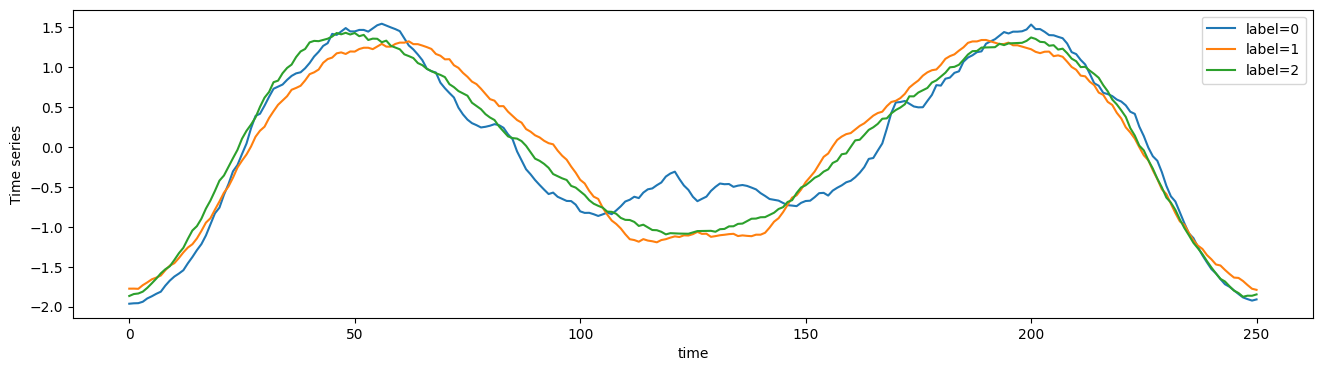

In [7]:
ts_0 = df_train[df_train["label"]=="0"]["ts"].values[0]
ts_1 = df_train[df_train["label"]=="1"]["ts"].values[0]
ts_2 = df_train[df_train["label"]=="2"]["ts"].values[0]

fig, ax = plt.subplots(1, figsize=plt.figaspect(.25))
plt.plot(ts_0, "C0", label="label=0")
plt.plot(ts_1, "C1", label="label=1")
plt.plot(ts_2, "C2", label="label=2")

plt.legend()
plt.xlabel("time")
plt.ylabel("Time series")
plt.show()

In [8]:
rocket = RocketClassifier(num_kernels=1_000)
rocket.fit(arrow, arrow_labels)
y_pred = rocket.predict(arrow_test)

In [9]:
print(accuracy_score(arrow_test_labels, y_pred))

0.8228571428571428


In [10]:
print(classification_report(arrow_test_labels, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.59      0.73        69
           1       0.82      0.96      0.89        53
           2       0.75      0.98      0.85        53

    accuracy                           0.82       175
   macro avg       0.84      0.85      0.82       175
weighted avg       0.84      0.82      0.81       175



References
1. https://arxiv.org/abs/1910.13051